## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [20]:
import plotly.io as pio

import cufflinks as cf
import plotly.offline
import plotly.graph_objs as go
import plotly.plotly as py

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Load Data

In [21]:
# df1 = pd.read_csv('/home/ark/Desktop/ZSimmulation/CodingAssignment/countries-aggregated.csv',index_col=[1])

#df2 = df1.filter(like='US',axis=0).filter(items=['Confirmed','Recovered','Deaths'])
#numpy.diff(df2.values,axis=0)

In [61]:
df1 = pd.read_csv('italy.csv', sep=',')

In [62]:
df1= df1.drop([0, 1])
df1 = df1.reset_index()
df1 = df1.drop(columns=['index'])
df1.columns = df1.iloc[0]
# df1.to_csv('italy.csv', sep=',', encoding='utf-8')

In [63]:
df1

,Date,Confirmed,Recovered,Deaths,Susceptible,exposed,infected,recovered,Flight Percentage,Flights /Month,Incoming,Outgoing
0,Date,Confirmed,Recovered,Deaths,Susceptible,exposed,infected,recovered,Flight Percentage,Flights /Month,Incoming,Outgoing
1,January,2,0,0,60461824,60,2,0,-3.30%,26718.63548,14962.4358688,11756.1996112
2,February,1128,46,29,60460669,33840,1128,46,-4.20%,26469.96152,14823.1784512,11646.7830688
3,March,105792,15729,12428,60343606,3173760,105792,15729,-56.30%,12074.50228,6761.7212768,5312.7810032
4,April,205463,75945,27967,60228396,6163890,205463,75945,-85.65%,3964.96814,2220.3821584,1744.5859816
5,May,232997,157507,33415,60195414,6989910,232997,157507,-83.25%,4628.0987,2591.735272,2036.363428
6,June,240578,190248,34767,60186481,7217340,240578,190248,-84.90%,4172.19644,2336.4300064,1835.7664336
7,July,247537,199974,35141,60179148,7426110,247537,199974,-63.03%,10216.35519,5721.1589064,4495.1962836
8,August,252235,202923,35231,60174360,7567050,252235,202923,-50.20%,13759.95912,7705.5771072,6054.3820128


In [64]:
# df1 = df1.drop(columns=['Unnamed: 0'])
df1= df1.drop([0])

In [65]:
# df1= df1.drop([0])

In [66]:
df1.Susceptible = df1.Susceptible.astype('float')
df1.Confirmed = df1.Confirmed.astype('float')
df1.Recovered = df1.Recovered.astype('float')
df1.Deaths = df1.Deaths.astype('float')
df1.exposed = df1.exposed.astype('float')
df1.infected = df1.infected.astype('float')
df1.recovered = df1.recovered.astype('float')
df1.Incoming = df1.Incoming.astype('float')
df1.Outgoing = df1.Outgoing.astype('float')

In [67]:
df1.exposed = df1.exposed/df1.exposed.min()

In [68]:
months = ["January", "February", "March", "April", "May", "June", "July", "August"]
df1['Date'] = pd.Categorical(df1['Date'], categories=months, ordered=True)

In [69]:
df1["New_Infected"] = [2,1126,104664,99671,27534,7581,6959,4698]

In [70]:
df1

,Date,Confirmed,Recovered,Deaths,Susceptible,exposed,infected,recovered,Flight Percentage,Flights /Month,Incoming,Outgoing,New_Infected
1,January,2.0,0.0,0.0,60461824.0,1.0,2.0,0.0,-3.30%,26718.63548,14962.435869,11756.199611,2
2,February,1128.0,46.0,29.0,60460669.0,564.0,1128.0,46.0,-4.20%,26469.96152,14823.178451,11646.783069,1126
3,March,105792.0,15729.0,12428.0,60343606.0,52896.0,105792.0,15729.0,-56.30%,12074.50228,6761.721277,5312.781003,104664
4,April,205463.0,75945.0,27967.0,60228396.0,102731.5,205463.0,75945.0,-85.65%,3964.96814,2220.382158,1744.585982,99671
5,May,232997.0,157507.0,33415.0,60195414.0,116498.5,232997.0,157507.0,-83.25%,4628.0987,2591.735272,2036.363428,27534
6,June,240578.0,190248.0,34767.0,60186481.0,120289.0,240578.0,190248.0,-84.90%,4172.19644,2336.430006,1835.766434,7581
7,July,247537.0,199974.0,35141.0,60179148.0,123768.5,247537.0,199974.0,-63.03%,10216.35519,5721.158906,4495.196284,6959
8,August,252235.0,202923.0,35231.0,60174360.0,126117.5,252235.0,202923.0,-50.20%,13759.95912,7705.577107,6054.382013,4698


In [78]:
df1.groupby(df1['Date'])[["Incoming","Outgoing"]].sum().iplot(kind='scatter',title = 'Incoming and Outgoing Per Month')

In [73]:
df1.groupby(df1['Date'])[["New_Infected"]].sum().iplot(kind='bar',title = 'Infected per Month')

In [74]:
df1.groupby(df1['Date'])[["Susceptible"]].sum().iplot(kind='scatter',title = 'Susceptible Per Month')

In [75]:
df1.groupby(df1['Date'])[["Confirmed","Recovered","Deaths","exposed","infected"]].sum().iplot(kind='bar',title = 'Historicall Data of compartments (Italy) Per Month')

In [76]:
df1.groupby(df1['Date'])[["Confirmed","Recovered","Deaths","exposed","infected"]].sum().iplot(kind='scatter',title = 'Historicall Data of compartments (Italy) by Month')

## Parameters values

In [46]:
# Lwi=df1.Outgoing.min()
# Liw=df1.Incoming.min()
# Lwc=df1.Outgoing.min()
# Lcw=df1.Incoming.min()
N = 11081000

Lwi=df1.Outgoing.max()
Liw=df1.Incoming.max()
Lwc=df1.Outgoing.max()
Lcw=df1.Incoming.max()
CLwc=7.17226
CLcw=8.10500


S = df1.Susceptible.max()
CLwc=7.172260
CLcw=8.10500


Di = 6.4
De = 3.5

R0 = 2.8

## Differential equation

In [47]:
# SEIR model differential equations.
def SEIR(x, t):
    S, E, I , R, u, z, v, alpha, beta, gamma, N = x
    ds = ( u - ((S/N)*(beta*I+z))-(v*S))   #-(1-u)*beta * s * i
    
    de = ((S/N)*(beta*I+z))-(alpha*E)-(v*E)                                   #(1-u)*beta * s * i - alpha * e
    
    di = (alpha*E) - (gamma*I) - (v*I)                                                      #alpha * e - gamma * i
    
    dr = (gamma*I)-(v*R)                                    #gamma * i
    
    return [ds, de, di, dr, u, z, v, alpha, beta, gamma, N]

In [48]:
u = (Liw+Lcw)/N
#0.0005 
#(Liw+Lcw)/N
z = 0
v= (Lwi/N) + (Lwc/N)
alpha = 1/De
gamma = 1/Di
beta = R0/Di
R0= (alpha*beta*u)/(v*(alpha+v)*(gamma+v))
# initial number of infected and recovered individuals
exposed_initial = 1.75
#df1.exposed.min()
infected_initial = 0.0
recovered_initial = 0.0
susceptible_initial =df1.Susceptible.max()/N 
# 5 - exposed_initial - infected_initial - recovered_initial
#df1.Susceptible.min()

In [49]:
S = susceptible_initial
E = exposed_initial
I = infected_initial
R = recovered_initial

## Solving the system

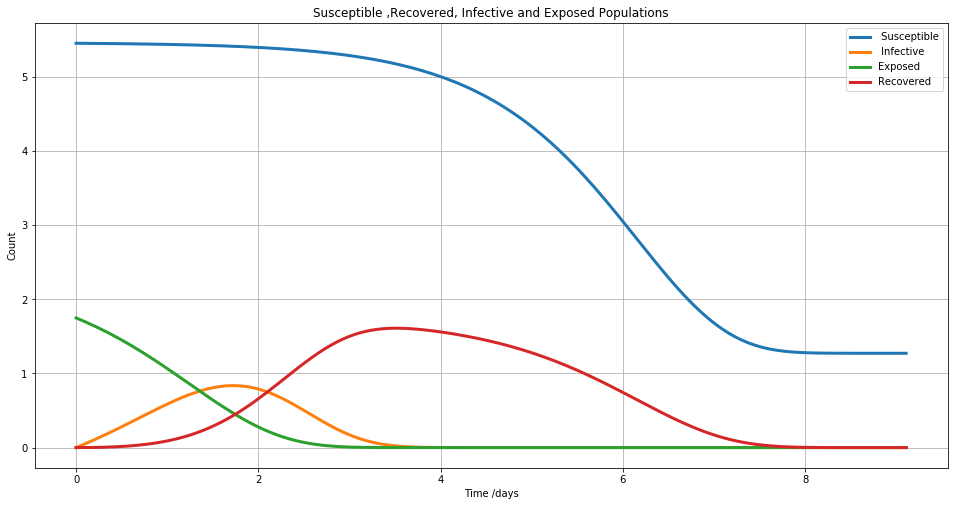

In [50]:
t = np.linspace(0, 9.11, 150, endpoint=True)
IC = [S, E, I , R, u, z, v, alpha, beta, gamma, N]
soln = odeint(SEIR, IC, t)
S, E, I, R = soln[:, 0], soln[:, 1], soln[:, 2], soln[:, 3]

def plotdata(t, S, E, I, R):
    # plot the data
    fig = plt.figure(figsize=(36,18))
    ax = [fig.add_subplot(221, axisbelow=True)]

    ax[0].plot(t, S, lw=3, label=' Susceptible')
    ax[0].plot(t, I, lw=3, label=' Infective')
    ax[0].plot(t, E, lw=3, label='Exposed')
    ax[0].plot(t, R, lw=3, label='Recovered')
    ax[0].set_title('Susceptible ,Recovered, Infective and Exposed Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Count')

    for a in ax: 
        a.grid(True)
        a.legend()
    plt.savefig('Italy_'+R0+'.png')

plotdata(t, S, E, I, R)

In [44]:
print(R0)

3.489972375020764
